In [21]:
# https://www.kaggle.com/code/rajsing/quora-text-classification
import pandas as pd

data_dir = './input'
train = data_dir + '/train.csv'
test = data_dir + '/test.csv'

# sub_df = pd.read_csv(sample)
test_df = pd.read_csv(test)
raw_df = pd.read_csv(train)
# raw_df

insincere_df = raw_df[raw_df.target==1]
# insincere_df.question_text.values[:10]

sincere_df = raw_df[raw_df.target==0]
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

<AxesSubplot: >

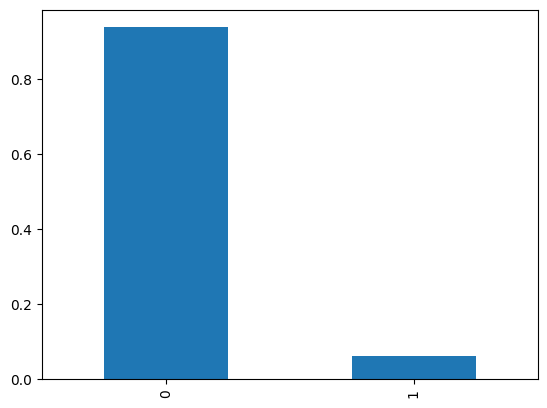

In [15]:
raw_df.target.value_counts(normalize=True)
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [16]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [4]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


<AxesSubplot: >

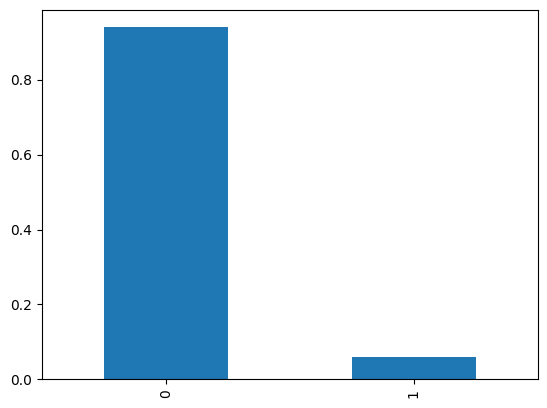

In [18]:
sample_df.target.value_counts(normalize=True).plot(kind='bar')

In [5]:
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [6]:
q1 = raw_df[raw_df.target==1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

In [20]:
# Text Preprocessing Techniques

# Tokenization
# splitting a documents into words and separators

from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

q0_tok

[nltk_data] Downloading package punkt to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: list.count() takes exactly one argument (0 given)

In [9]:
# stopwords
from nltk.corpus import stopwords

nltk.download('stopwords')
english_words = stopwords.words('english')

print(",".join(english_words))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_words]

q0_stp = remove_stopwords(q0_tok)
q1_stp = remove_stopwords(q1_tok)
print(q0_stp)


i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't
['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt',

[nltk_data] Downloading package stopwords to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Stemmanization

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
print(stemmer.stem('going'))
print(stemmer.stem('supposedly'))

q0_stm = [stemmer.stem(word) for word in q0_stp]
q1_stm = [stemmer.stem(word) for word in q1_stp]
print(q0_stm)


go
suppos
['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']


In [12]:
# Lemanization
# 'love'->'love' 'lovely'->'love' 'loved'->'love'
# Implementation BagOfheader
# 1. Create a vocubulary using CountVectorizer
# 2. transform text to vector using CountVectorizer
# 3.Configure text preprocessing using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

small_df = sample_df[:5]
print(small_df.question_text.values)

small_vect = CountVectorizer()
small_vect.fit(small_df.question_text)

print(small_vect.vocabulary_)
print(small_vect.get_feature_names_out())
print(len(small_vect.get_feature_names_out()))


['What is the most effective classroom management skill/technique to create a good learning environment?'
 'Can I study abroad after 10th class from Bangladesh?'
 'How can I make friends as a college junior?'
 'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?'
 'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?']
{'what': 49, 'is': 31, 'the': 47, 'most': 39, 'effective': 16, 'classroom': 9, 'management': 37, 'skill': 44, 'technique': 46, 'to': 48, 'create': 11, 'good': 23, 'learning': 34, 'environment': 17, 'can': 7, 'study': 45, 'abroad': 1, 'after': 2, '10th': 0, 'class': 8, 'from': 21, 'bangladesh': 6, 'how': 25, 'make': 36, 'friends': 20, 'as': 5, 'college': 10, 'junior': 32, 'do': 13, 'download': 14, 'free': 19, 'apk': 4, 'minecraft': 38, 'pocket': 43, 'edition': 15, 'for': 18, 'ios': 29, 'iphone': 30, 'like': 35, 'kuvera': 33, 'groww': 24, 'also': 3, 'online': 41, 'investment': 28, 'platform': 42, 'wher

In [13]:
vectors = small_vect.transform(small_df.question_text)
print(vectors.toarray())
print(len(vectors.toarray()[0]))

[[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
  0 1 0 1 0 0 0 0 1 0 1 1 1 1 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
  0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1
  0 0 0 0 1 1 1 0 0 0 0 0 0 0 1]]
51


In [14]:
stemmer = SnowballStemmer(language='english')

def tokenizer(text):
    return [stemmer.stem(word) for word in word_tokenize(text) ]

tokenizer('What is the really (dealing) here?')


['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [15]:
import time
vectorizer = CountVectorizer(lowercase=True,tokenizer=tokenizer, stop_words=english_words, max_features=1000)

vectorizer.fit(sample_df.question_text)

/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenizer at 0x29a691ea0>)

In [16]:
print(len(vectorizer.vocabulary_))
print(vectorizer.get_feature_names_out()[:100])


1000
['!' '$' '%' '&' "'" "''" "'m" "'s" '(' ')' ',' '-' '.' '1' '10' '100'
 '12' '12th' '15' '2' '20' '2017' '2018' '3' '4' '5' '6' '7' '8' ':' '?'
 '[' ']' '``' 'abl' 'abroad' 'abus' 'accept' 'access' 'accomplish'
 'accord' 'account' 'achiev' 'act' 'action' 'activ' 'actor' 'actual' 'ad'
 'add' 'address' 'admiss' 'adult' 'advanc' 'advantag' 'advic' 'affect'
 'africa' 'african' 'age' 'agre' 'air' 'allow' 'almost' 'alon' 'alreadi'
 'also' 'altern' 'alway' 'amazon' 'america' 'american' 'amount' 'analysi'
 'android' 'ani' 'anim' 'anoth' 'answer' 'anxieti' 'anyon' 'anyth' 'apart'
 'app' 'appear' 'appl' 'appli' 'applic' 'approach' 'arab' 'area' 'armi'
 'around' 'art' 'asian' 'ask' 'associ' 'atheist' 'attack' 'attend']


In [17]:
inputs = vectorizer.transform(sample_df.question_text)
inputs.shape


(100000, 1000)

In [23]:
from sklearn.model_selection import train_test_split

# stratify
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size=0.3, random_state=42)
print(train_inputs)
# print(train_targets.shape)

# val_targets.target.value_counts(normalize=True).plot(kind='bar')


  (0, 30)	1
  (0, 157)	1
  (0, 293)	1
  (0, 307)	1
  (0, 394)	1
  (0, 488)	1
  (0, 551)	1
  (0, 625)	1
  (0, 781)	1
  (1, 30)	1
  (2, 19)	1
  (2, 23)	1
  (2, 25)	1
  (2, 27)	1
  (2, 30)	1
  (2, 511)	1
  (2, 622)	1
  (3, 30)	1
  (3, 124)	1
  (4, 30)	1
  (4, 138)	1
  (4, 237)	1
  (5, 30)	1
  (5, 402)	1
  (5, 441)	1
  :	:
  (69995, 984)	1
  (69996, 3)	1
  (69996, 8)	1
  (69996, 9)	1
  (69996, 30)	2
  (69996, 198)	1
  (69996, 230)	1
  (69996, 381)	1
  (69996, 395)	1
  (69996, 402)	1
  (69996, 616)	1
  (69996, 703)	1
  (69997, 30)	1
  (69997, 214)	1
  (69997, 554)	1
  (69997, 706)	1
  (69998, 30)	1
  (69998, 46)	1
  (69998, 343)	1
  (69998, 777)	1
  (69998, 982)	1
  (69999, 30)	1
  (69999, 51)	1
  (69999, 167)	1
  (69999, 704)	1


/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  0.9504428571428571
F1:  0.4457581083240134
For Sincere:  [0 0 0 0 0 0 1 0 0 0]
For Insincere:  [0 0 1 1 0 0 0 1 0 0]
Val Accuracy:  0.9467
Val F1:  0.40843507214206437


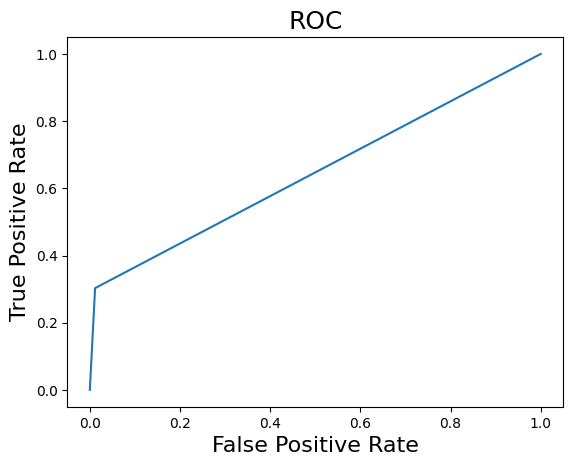

In [19]:
# Logistic Regression, just for comparizon

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from libs.simpleplotter import simple_roc

MAX_ITER = 1000
model = LogisticRegression(max_iter=1000, solver='sag')
model.fit(train_inputs, train_targets)

train_pred = model.predict(train_inputs)

print('Accuracy: ', accuracy_score(train_targets, train_pred))
print('F1: ', f1_score(train_targets, train_pred))

print('For Sincere: ', model.predict(vectorizer.transform(sincere_df.question_text.values[:10])))
print('For Insincere: ', model.predict(vectorizer.transform(insincere_df.question_text.values[:10])))

val_pred = model.predict(val_inputs)

print('Val Accuracy: ', accuracy_score(val_targets, val_pred))
print('Val F1: ', f1_score(val_targets, val_pred))

# print('For Sincere: ', model.predict(vectorizer.transform(sincere_df.question_text.values[:10])))
# print('For Insincere: ', model.predict(vectorizer.transform(insincere_df.question_text.values[:10])))
simple_roc(val_targets, val_pred)


In [ ]:
import tensorflow as tf

text_config = text_tok.get_config()
text_vocab = eval(text_config['index_word'])

vocab_size = len(text_vocab) + 1
# The embedding dimension
embedding_dim = 64
# Number of RNN units
rnn_units = 100
#batch size
BATCH_SIZE=90
# num of NER classes
num_classes = len(ner_vocab)+1
dropout=0.2

def build_model_bilstm(vocab_size, embedding_dim, rnn_units, batch_size, classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True,
                  batch_input_shape=[batch_size,
                                     None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=rnn_units,
                           return_sequences=True,
                           dropout=dropout,
                           kernel_initializer=
                               tf.keras.initializers.he_normal())),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(rnn_units, activation='relu')),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

model = build_model_bilstm(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE,
    classes=num_classes)
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])